<a href="https://colab.research.google.com/github/Son-github/DC-chapter5_2/blob/main/dc_chapter5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 100MB/s] 


'ns_book7.csv'

In [2]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)

In [4]:
count_by_year = ns_book7['발행년도'].value_counts() #value_counts()는 고유한 값의 등장 횟수를 계산
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [5]:
count_by_year = count_by_year.sort_index() #sort_index()는 인덱스 순으로 정렬
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [6]:
count_by_year = count_by_year[count_by_year.index <= 2030]
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

In [7]:
import numpy as np

def kdc_1st_char(no): #'주제분류번호'열의 값이 NaN인 경우 -1 반환. 아니면 '주제분류번호'의 첫 번째 문자를 반환.
  if no is np.nan:
    return '-1'
  else:
    return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

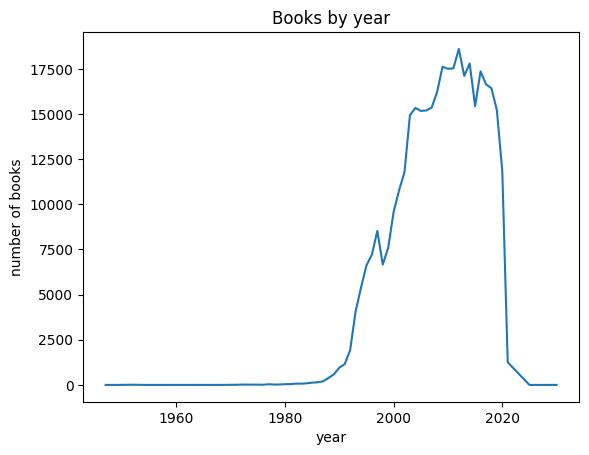

In [9]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

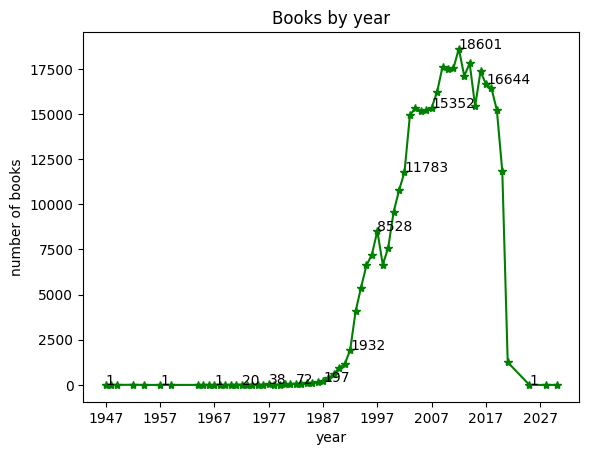

In [10]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items(): #슬라이스 연산자의 스텝 욥션 사용
  plt.annotate(val, (idx, val)) #첫 번째 매개변수는 그래프에 나타낼 문자열, 두 번째 매개변수는 텍스트가 나타날 x, y 좌표.
plt.show()

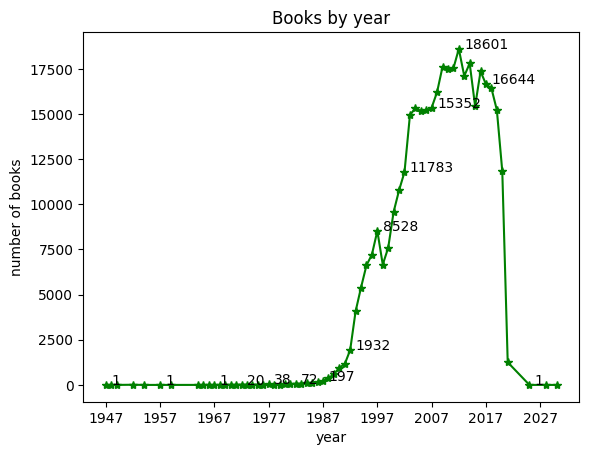

In [11]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val, (idx, val), xytext=(idx+1, val+10)) #xytext는 x축은 1만큼, y축으로는 10만큼 떨어지게 함.
plt.show()

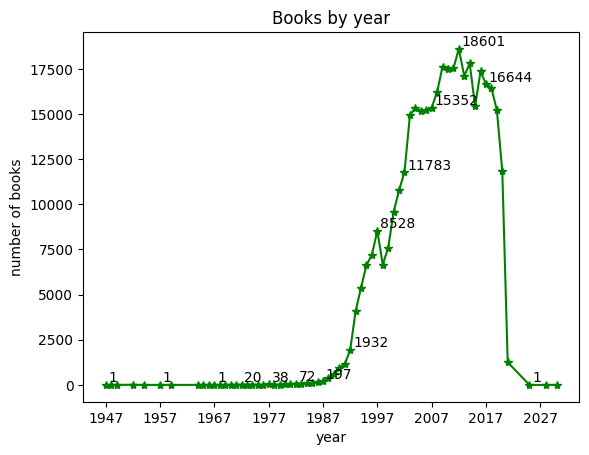

In [12]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val, (idx, val), xytext=(2,2), textcoords='offset points') #textcoords는 상대적인 위치를 포인트나 픽셀 단위로 지정.
plt.show()

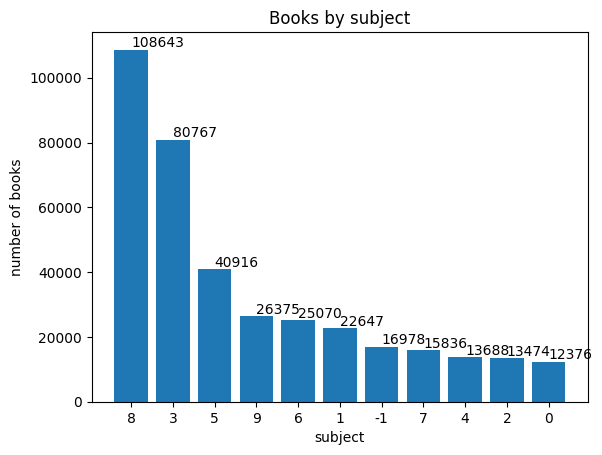

In [14]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points')
plt.show()